# Credit Card Fraud Detection Case with Python


### Author: _Jan Erish Baluca_
_LinkedIn: https://www.linkedin.com/in/jan-erish-baluca-099569103/_

**Primary Task**: Predict Credit Card Fraud  
**Secondary Task**: Determine which model is best suited to the task.  
**Tools**: Machine Learning: _Supervised Learning_ using **Python**  

**_Always a work in progress! Will be continuously adding new models and improving implemented ones._**

**Data**: Credit card transactions in September 2013 by european card holders that occured in two days.  
All the features are numeric as a result of PCA (Principal Component Analysis) transformations (except 'Time' and 'Amount').  
_Due to confidentiality issues, the original features and background information are not available._

**'Class'** is the target variable. The value **1** is for cases of fraud and **0** for otherwise.

_Source: https://www.kaggle.com/dalpozz/creditcardfraud_

In [1]:
%matplotlib inline

In [2]:
# Importing the data and basic packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('creditcard.csv')
df = df.drop('Time', axis=1)
df.reset_index(inplace=True)

# Exploratory Data Analysis

It is important to always conduct exploratory data analysis before attempting to create a predictive model.

A **correlation matrix** is always a good way to start.
We can visualize it using seaborn's Heat Map.

But first, let us check for missing values.

In [3]:
# Numerical EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
index     284807 non-null int64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26    

It seems like there are no missing values. We can now proceed with the correlation matrix.

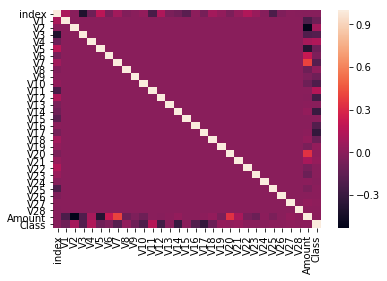

In [4]:
# Correlation Matrix
corr = df.corr()
sns.heatmap(corr, yticklabels=corr.columns.values, xticklabels=corr.columns.values)

target_corr = pd.DataFrame(corr.iloc[-1,:-1]).reset_index()

The heatmap reveals the intensity of correlations between all the features in our dataset.

What's important, however, is the relationship of the features with our target, which is the Class.

It is more helpful to isolate Class's relationship with the rest of the features.

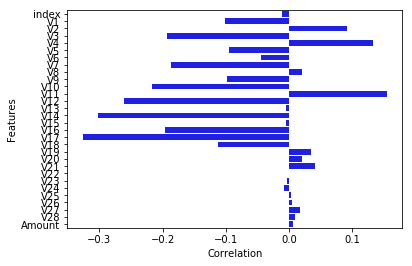

In [5]:
fig = sns.barplot(x='Class', y='index', data=target_corr, color='b')
fig.set(ylabel='Features',xlabel='Correlation')
plt.show()

We see that quite a number of the features have a notable negative correlations with our target. Only about three have considerable positive correlations.

Let us examine V17 and V14, our top two contenders for our team of strong predictors.

A scatter plot is an intuitive way to check if there are clusters of legitimate and fraudulent transactions based on these two features.

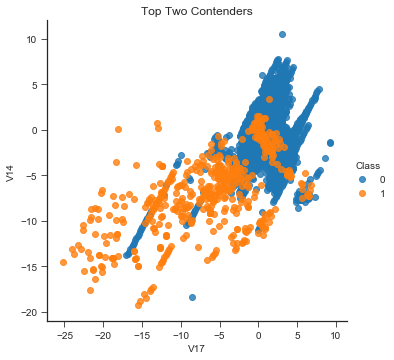

In [6]:
# ONE-SAMPLE T-TEST

# Scatter Plot: V17 vs. V14
sns.set_style('ticks')
sns.lmplot('V17','V14', data=df,hue='Class', fit_reg=False)
plt.title('Top Two Contenders')
plt.xlabel('V17')
plt.ylabel('V14')
plt.show()

It seems that these two features really do make our two clusters, fraudulent and legitimate transactions, very visible. There are, however, very serious overlaps between the two clusters.

I wonder what adding a third feature into the mix would do...

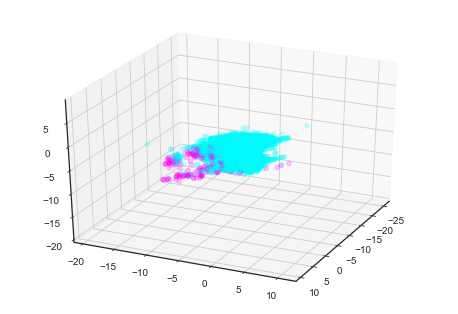

In [7]:
# 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D
import pylab
ax = Axes3D(plt.gcf())
ax.scatter(xs=df['V17'],ys=df['V14'], zs=df['V12'], c=df['Class'], s=20, cmap=pylab.cm.cool, alpha=0.2)
ax.view_init(azim=25)

Looks like our third dimension further reflects our clustering.

# Feature Importance

Our plots show that some features have very strong relationships with the target, while some have very weak correlation.

It is very important to get rid of features that will not help in classifying transactions. 

A **decision tree classifier** ranks features used for prediction.

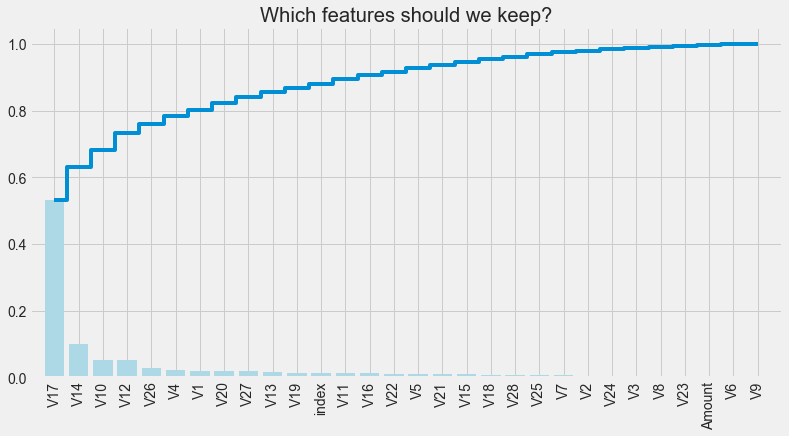

In [8]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 6)

# Split into train and test sets
target_name = 'Class'
X = df.drop(target_name, axis =1)
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
y = df[target_name]

# Is it recommended to stratify in order to keep the same proportion of 1s and 0s
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

dtree = tree.DecisionTreeClassifier()
    #class_weight='balanced')
                                    #min_weight_fraction_leaf=0.01)
dtree = dtree.fit(X_train,y_train)

# Plot!

importances = dtree.feature_importances_
feat_names = df.drop(['Class'], axis=1).columns

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Which features should we keep?")
plt.bar(range(len(indices)), importances[indices], color='lightblue', align='center')
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical', fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

Let's hire our top 4 contenders as our Strong Predictor Team!

In [9]:
# Drop unwanted features
team = feat_names[np.argsort(importances)[-4:]]
X = df[team]
print(X.info())

# Split into train and test sets again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 4 columns):
V12    284807 non-null float64
V10    284807 non-null float64
V14    284807 non-null float64
V17    284807 non-null float64
dtypes: float64(4)
memory usage: 8.7 MB
None


# Distribution

Before we proceed with testing models for our binary classification task, it is of utmost importance to check out the distribution of classes. 

In [10]:
fraud_count = df['Class'].sum()
transactions_count = df['Class'].count()
fraud_ratio = fraud_count/transactions_count
print("Fraud Transactions: {}".format(fraud_count))
print("Total Transactions: {}".format(transactions_count))
print("Fraud Ratio: {:0.2f}%".format(fraud_ratio*100))

Fraud Transactions: 492
Total Transactions: 284807
Fraud Ratio: 0.17%


# It's Skewed! How do we deal with it?
Looks like we have a case of severe **class imbalance**!   
With such a skewed distribution of class, we cannot simply rely on model precision in evaluating performance.

_There are two errors that we want to minimize in our predictions:_

>**_False Positives (Type I Error)_**  
>>    = label as Fraud (1), but transaction is actually legitimate

>**_False Negatives (Type II Error)_**  
>>    = label as Legit (0), but transaction is actually fraudulent
    
Given our task at hand, **_what we really want to minimize are the false negatives_**.  
How do we measure performance based on these, then? Let's get back to that later.

For now, let us proceed with building our first predictive model: Logistic Regression.

# Logistic Regression

Unlike Linear Regression, Logistic Regression is used for classification problem.
It produces probabilities for each case. By default, the threshold is 0.5.
If the probability is greater than 0.5, the data is labeled as 1.
If the probability is less than 0.5, the data is labeled as 0.
It creates a linear decision boundary.

Additionally, in order to find the best parameters for our Logistic Regression model, we will use **Hyperparameter Tuning**.
GridSearchCV tries out all values from a given range as our hyperparameter and returns the value that gives the best performance score.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

# Hyperparameter Tuning
logreg = LogisticRegression()
c_space = np.logspace(-5, 8, 15)
param_grid = {'C' : c_space}
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_train, y_train)

print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression: Best Score: {}".format(logreg_cv.best_score_))

# Using our best paramters
logreg = LogisticRegression(**logreg_cv.best_params_)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Evaluating the Model
logreg_roc_auc = roc_auc_score(y_test, y_pred_prob)
print("Logistic Regression AUC Score: {}".format(logreg_roc_auc))

# Classification Report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

# Compute cross-validated AUC scores
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')
print("Logistic Regression Cross-validated AUC scores: {}".format(cv_auc))


Tuned Logistic Regression Parameters: {'C': 3.7275937203149381}
Tuned Logistic Regression: Best Score: 0.999161710812175
Logistic Regression AUC Score: 0.9562708876459982
Logistic Regression Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56864
          1       0.81      0.57      0.67        98

avg / total       1.00      1.00      1.00     56962

Logistic Regression Cross-validated AUC scores: [ 0.97725598  0.9792489   0.95118037  0.93253369  0.9280713 ]


# Evaluating Model Performance

*So what do the scores above even mean?*

**Precision:** the ratio of correctly labeled fraudulent transactions to the total transactions classified as fraudulent. 

  (True Positives / (True Positives + False Positives))  
>  **_High Precision_**  
> >= low false positive rate  
= not many legit transactions classified as fraud

**Recall:** ratio of correctly labeled fraudulent transactions to the total number of correctly labeled fraud AND undetected fraud.

  (True Positives / (True Positives + False Negatives))  
>  **_High Recall_**  
> >= low false negative rate  
= predicted most fraud transactions correctly
        
**F1 Score:** harmonic mean of precision and recall

Since we have a skewed data (very low proportion of fradulent transactions), we should aim to maximise our Recall. 

The **ROC Curve** (Receiver Operating Characteristic Curve) plots and illustrates the true positive rates (TPRs) and the false positive rates (FPRs) over a range of threshold settings. In logistic regression (the default is 0.5 probability), this is from 0.0 to 1.0. 

However, since we are looking at a dataset with very high class imbalance, it is better to look at the **Area Under the ROC Curve (AUC)**. The larger the area under the ROC curve, the better the model.

**Cross-validation** is simply for ensuring that the score is not being strongly affected by the way the origincal dataset has been split.

Before plotting our AUCs, let us use other Supervised Learning models first.

# k-Nearest Neighbors  

This model predicts the label of a data point by looking at the 'k' number of closest labeled data points and taking a majority vote.

Since we are not sure which number of data points to consider would give the best results, we will also use **Hyperparameter Tuning** on our model.

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_grid={'n_neighbors': np.arange(1,10)}
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)
print("Hyperparameter Tuning: Best Parameter: {}".format(knn_cv.best_params_))
print("Hyperparameter Tuning: Best Score: {}".format(knn_cv.best_score_))

knn = KNeighborsClassifier(**knn_cv.best_params_)
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)
knn_roc_auc = roc_auc_score(y_test, knn.predict(X_test))
print("kNN score: {}".format(knn_score))
print("kNN AUC Score: {}".format(knn_roc_auc))
print("kNN Classification Report:\n{}".format(classification_report(y_test, knn.predict(X_test))))

Hyperparameter Tuning: Best Parameter: {'n_neighbors': 5}
Hyperparameter Tuning: Best Score: 0.9994996598564814
kNN score: 0.9995611109160493
kNN AUC Score: 0.8979152191264801
kNN Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56864
          1       0.94      0.80      0.86        98

avg / total       1.00      1.00      1.00     56962



# Random Forest Model

### Decision Tree and Random Forest Intuition:
Simply put, a **Decision Tree Classifier** creates splits in our data in order to minimize information entropy (the unpredicatbility).  
It maximizes the number of "leaves" or data points in each "tree" or split in data.  
This old technique has been steadily losing popularity until it was recently revived with upgrades through tech innovations.  
One such upgrade is the _Random Forest Model_.  

A **Random Forest Model** uses _Ensemble Learning_: it creates a selected number of decisions trees trained by historical data.  
Each new data point is then passed through this forest of decision trees and is assigned to the category that wins the majority vote (_imagine! trees having the right to vote..._). 

In [13]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, class_weight="balanced")
rf.fit(X_train, y_train)
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print("Random Forest AUC score: {}".format(rf_roc_auc))
print("Random Forest Classification Report:\n{}".format(classification_report(y_test, rf.predict(X_test))))

Random Forest AUC score: 0.8928131783101535
Random Forest Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56864
          1       0.94      0.79      0.86        98

avg / total       1.00      1.00      1.00     56962



# Naïve Bayes Classifier

Another classifier that returns probabilities is the **Naïve Bayes Classifier**, which is based on _Bayesian Theorem_. It descrbes the probability of an event based on prior knowledge of conditions that might be related to said event.

What makes is "naïvee" is its base assumption that the variables we are working with are independent - the assumption of **independence**.  
Often times, the assumption is not correct, but it works anyway.

In [14]:
# Bayesian Model
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)
NB.score(X_test, y_test)
NB_roc_auc = roc_auc_score(y_test, NB.predict(X_test))
print("Naive Bayes AUC score: {}".format(NB_roc_auc))
print("Naive Bayes Classification Report:\n{}".format(classification_report(y_test, NB.predict(X_test))))

Naive Bayes AUC score: 0.933728380209709
Naive Bayes Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     56864
          1       0.13      0.88      0.23        98

avg / total       1.00      0.99      0.99     56962



Our Naive Bayes classifier seems to have horrible precision!!! Ahaha whyyy

# Kernel SVM (Support Vector Machine) Classifier

### SVM Intuition:

Like in our previous machine learning models, SVM also creates a decision boundary in order to classify data points, or rather, "**vectors**." In a multidemensional space, data entries are referred to as "vectors" since when there is more than two dimensions, they can no longer be a "point." In a multi-demensional space, our decision boundary is then called a "**Hyperplane**."  

What makes SVM unique is the way it determines the decision boundary.  
Most algorithms would try to learn from the most orange-ish of oranges and the most apple-ish of apples to be able to classify incoming unkown fruits.  
SVM, on the other hand, looks at the most orange-ish apple and the most apple-ish orange in order to decide the decision booundary. These extreme cases are the two **_support vectors_**. The line that separates our classes are based on these two.  

But what happens when a dataset is _non-linearly separable_? For example, a cluster of a class might be completely surrounded by vectors of another class.  
What SVM does is that it uses a mapping function to bring the computation to a _higher dimension_ (a second, third, or more), creates a decision boundary at this level, and then projects it back to the original dimension/s.  
The problem with this, however, is that is is computationally demanding. This is why in our case, we will use the **_Kernel_** trick, which is capable of doing the same without requiring computation at a higher dimension.  

**Let's get to it!**

In [15]:
from sklearn.svm import SVC

# let us use a Gaussian RBF Kernel
kSVM = SVC(kernel='rbf', random_state=42, probability=True)
kSVM.fit(X_train, y_train)
kSVM.score(X_test, y_test)
kSVM_roc_auc = roc_auc_score(y_test, kSVM.predict(X_test))
print("Naive Bayes AUC score: {}".format(kSVM_roc_auc))
print("Naive Bayes Classification Report:\n{}".format(classification_report(y_test, kSVM.predict(X_test))))

Naive Bayes AUC score: 0.8724226008636431
Naive Bayes Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56864
          1       0.96      0.74      0.84        98

avg / total       1.00      1.00      1.00     56962



# Base Rate for Accuracy

To provide a reference point for our scores, we need a base rate.  
It tells us how much of the data is labeled 0. The scores of our models must be above the base model scores.

In [16]:
# Base Rate Model?!?!
from sklearn.metrics import accuracy_score
def bsr(X):
    y=np.zeros(X.shape[0])
    return y
y_bsr = bsr(X_test)
print("Base Rate accuracy: %2.2f" % accuracy_score(y_test, y_bsr))
base_roc_auc = roc_auc_score(y_test, y_bsr)
print("Base Rate AUC = %2.2f" % base_roc_auc)
print("Base Rate Classification Report:\n{}".format(classification_report(y_test, y_bsr)))

Base Rate accuracy: 1.00
Base Rate AUC = 0.50
Base Rate Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56864
          1       0.00      0.00      0.00        98

avg / total       1.00      1.00      1.00     56962



C:\Users\w1530920\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Plotting our ROC curves to check the AUCs

As mentioned earlier, another important method of evaluating model performance in lew of class imbalance is looking at the area under the ROC (Receiver Operating Characteristic) curve.

The larger the area, the better the model!

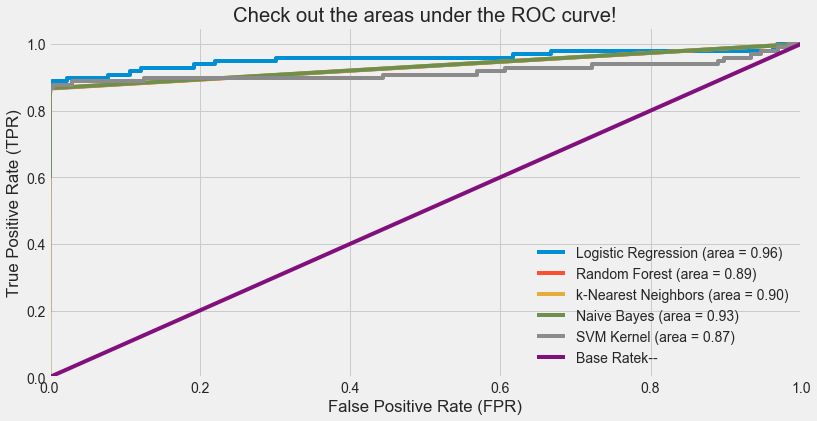

In [17]:
# Plot AUC
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
NB_fpr, NB_tpr, NB_thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
kSVM_fpr, kSVM_tpr, kSVM_thresholds = roc_curve(y_test, kSVM.predict_proba(X_test)[:,1])

# Plotting Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logreg_roc_auc)

# Plotting Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plotting k-Nearest Neighbors ROC
plt.plot(knn_fpr, knn_tpr, label='k-Nearest Neighbors (area = %0.2f)' % knn_roc_auc)

# Plotting Naïve Bayes ROC
plt.plot(NB_fpr, NB_tpr, label='Naive Bayes (area = %0.2f)' % NB_roc_auc)

# Plotting SVM Kernel ROC
plt.plot(kSVM_fpr, kSVM_tpr, label='SVM Kernel (area = %0.2f)' % kSVM_roc_auc)

# Plotting the Base Rate ROC
plt.plot([0,1], [0,1], label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Check out the areas under the ROC curve!')
plt.legend(loc='lower right')
plt.show()

### Looks like Logistic Regression wins this one! :D

# Using Logistic Regression Coefficients
_cr. Randy Lao for the idea_  

We can still use our logistic regression results in order to extract the probabilities of fraud for each transaction.  
Let us use the features that made the cut: V10, V12, V14, and V17

In [18]:
# Creating an intercept term for the logistic regression equation
df['int'] = 1
new_df = ['Class','V10', 'V12', 'V14', 'V17', 'int']
df = df[new_df]
X = df.drop(target_name, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)
print(df.iloc[153835,:])

# Extracting Feature Coefficients
import statsmodels.api as sm
logit = sm.Logit(y_train, X_train)
logit = logit.fit()
#print(logit.summary())
coefs = logit.params
print("Coefficients:\n{}".format(coefs))
def co (coefs, V10, V12, V14, V17):
    return coefs[4] + coefs[0]*V10 + coefs[1]*V12 + coefs[2]*V14 + coefs[3]*V17 

# Using an actual fraud case from our test set
co1 = co(coefs, df.iloc[153835, 1], df.iloc[153835, 2], df.iloc[153835, 3], df.iloc[153835, 4])
p = np.exp(co1) / (1+np.exp(co1))
print("Probability that our transaction is fraudulent: {:0.2f}%".format(p*100))

Class     1.000000
V10     -20.949192
V12     -11.924955
V14      -3.836781
V17     -15.825136
int       1.000000
Name: 153835, dtype: float64


C:\Users\w1530920\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.004394
         Iterations 12
Coefficients:
V10   -0.388449
V12   -0.214273
V14   -0.918022
V17   -0.073760
int   -8.046287
dtype: float64
Probability that our transaction is fraudulent: 99.93%


## Wait, what?

As you can see, logistic regression actually assigns coefficients to each feature.  
These coefficients represent the effect of each feature while also considering each feature's scaling.

Given the values our logisic regression have returned, we have this formula:  

**Fraud Score** = V10(**-0.388449**) + V12(**-0.214273**) + V14(**-0.918022**) + V17(**-0.073760**) + **-8.046287**  
The value -8.046287 is our **constant** that represents the effect of all uncontrolled variables.  
Transaction index **_153835_** is a _fraudulent_ transaction. Its features have the following values:  
**V10** =     -20.949192  
**V12** =     -11.924955  
**V14** =      -3.836781  
**V17** =     -15.825136  
We then apply these values to our formula.
_The result is the probability that our transaction is fraudulent_, which **is 99.93%**